<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Run_on_a_QUANTUM_IBM_COMPUTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U qiskit qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.7 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2

In [3]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="6m4PQGwTduqxUndjDxLiSiEwajfzozw0xDOPrByiuOiT",
    plans_preference=["open"],
    overwrite=True
)
print("✅ API key saved")

✅ API key saved


In [4]:
service = QiskitRuntimeService(plans_preference=["open"])
print("IBM Quantum service initialized")

qiskit_runtime_service.__init__:WARNING:2026-01-24 07:08:05,927: Instance was not set at service instantiation. Based on the following filters: (tags: None, region: us-east, eu-de, plans_preference: open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


IBM Quantum service initialized


In [5]:
real_backends = service.backends(
    simulator=False,
    operational=True,
    min_num_qubits=2
)

if not real_backends:
    raise RuntimeError(
        "❌ No real IBM Quantum hardware available right now.\n"
        "Try again later (free plan has limited access)."
    )

backend = min(real_backends, key=lambda b: b.status().pending_jobs)

print("✅ Running on REAL IBM Quantum hardware")
print("Backend:", backend.name)
print("Pending jobs:", backend.status().pending_jobs)


qiskit_runtime_service.backends:WARNING:2026-01-24 07:11:31,466: Loading instance: open-instance, plan: open


✅ Running on REAL IBM Quantum hardware
Backend: ibm_fez
Pending jobs: 0


In [6]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(0)          # Superposition
qc.cx(0, 1)      # Entanglement
qc.measure([0, 1], [0, 1])

print("Quantum Circuit:")
print(qc.draw())


Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [7]:
from qiskit import transpile

t_qc = transpile(qc, backend, optimization_level=1)

print("Transpiled Circuit:")
print(t_qc.draw())

Transpiled Circuit:
global phase: 3π/4
         ┌─────────┐┌────┐┌─────────┐              ┌─┐                    
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■────────────┤M├────────────────────
         ├─────────┤├────┤├─────────┤ │ ┌─────────┐└╥┘┌────┐┌─────────┐┌─┐
q_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■─┤ Rz(π/2) ├─╫─┤ √X ├┤ Rz(π/2) ├┤M├
         └─────────┘└────┘└─────────┘   └─────────┘ ║ └────┘└─────────┘└╥┘
    c: 2/═══════════════════════════════════════════╩═══════════════════╩═
                                                    0                   1 


In [8]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)

job = sampler.run([t_qc], shots=1024)

print("\n🚀 Job submitted successfully!")
print("Job ID:", job.job_id())
print(f"Track here: https://quantum.ibm.com/jobs/{job.job_id()}")


🚀 Job submitted successfully!
Job ID: d5q74j0r0v5s739oqhv0
Track here: https://quantum.ibm.com/jobs/d5q74j0r0v5s739oqhv0


In [9]:
result = job.result()
counts = result[0].data.c.get_counts()

print("\n🎯 Measurement Results (REAL Quantum Hardware):")
print(counts)


🎯 Measurement Results (REAL Quantum Hardware):
{'00': 522, '11': 455, '10': 32, '01': 15}


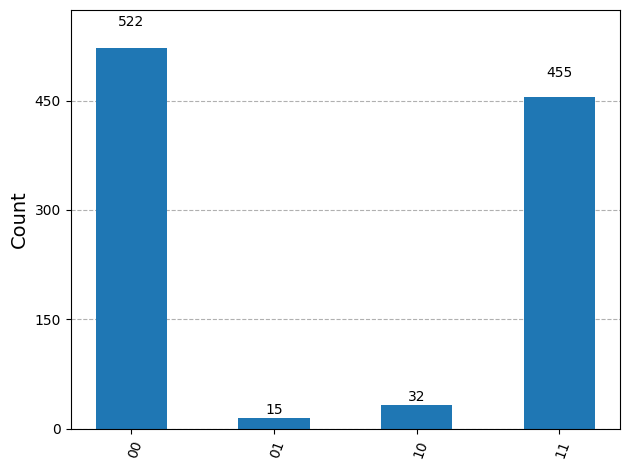

In [10]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

Ready-to-Use Assignment Explanation

“The histogram shows dominant |00⟩ and |11⟩ measurement outcomes, confirming the creation of an entangled Bell state. Minor occurrences of |01⟩ and |10⟩ are observed due to noise and decoherence effects present in real quantum hardware, which are absent in ideal simulators.”